In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/task1_cogno.csv')

In [ ]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [ ]:
df.isnull().sum()

,0
Region,14
Date,14
Frequency,14
Estimated Unemployment Rate (%),14
Estimated Employed,15
Estimated Labour Participation Rate (%),14
Area,14


In [ ]:
ndf=df.dropna()

In [ ]:
ndf.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


In [ ]:
ndf

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [ ]:
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
print(ndf.columns)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


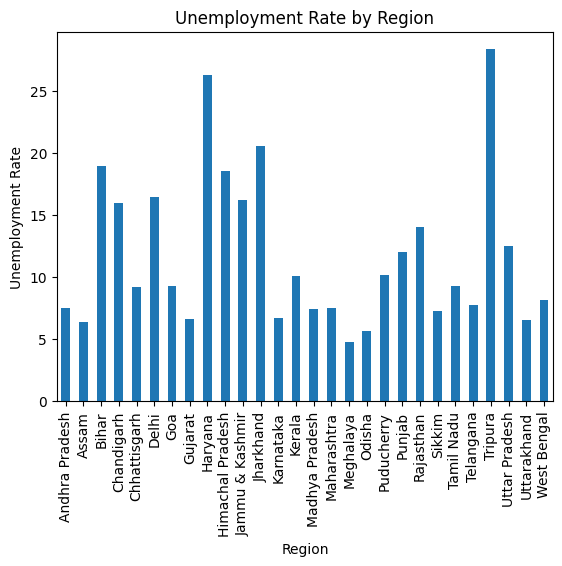

In [ ]:
ndf.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().plot(kind='bar')
plt.title('Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate')
plt.show()

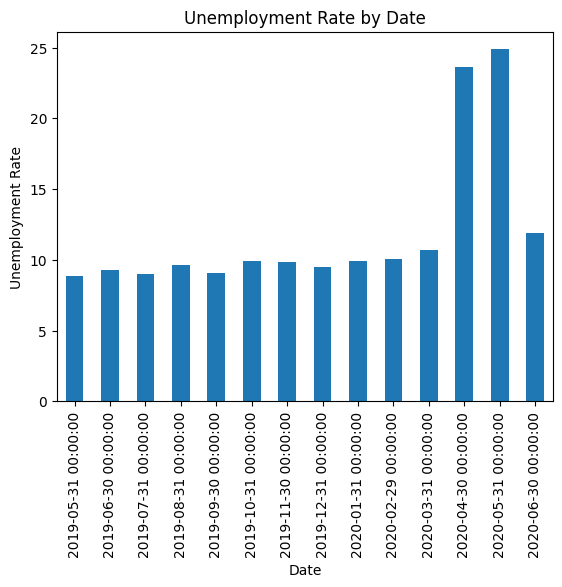

In [ ]:
ndf.groupby(' Date')[' Estimated Unemployment Rate (%)'].mean().plot(kind='bar')
plt.title('Unemployment Rate by Date')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.show()

which region has experienced the highest and lowest average unemployment rate?

In [ ]:
highest_unemployment_region = ndf.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().idxmax()
print(f"The region with the highest average unemployment rate is: {highest_unemployment_region}")

The region with the highest average unemployment rate is: Tripura


In [ ]:
lowest_unemployment_region = ndf.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().idxmin()
print(f"The region with the lowest average unemployment rate is: {lowest_unemployment_region}")

The region with the lowest average unemployment rate is: Meghalaya


<Axes: title={'center': 'Monthly Unemployment Rate'}, xlabel=' Date', ylabel='Unemployment Rate'>

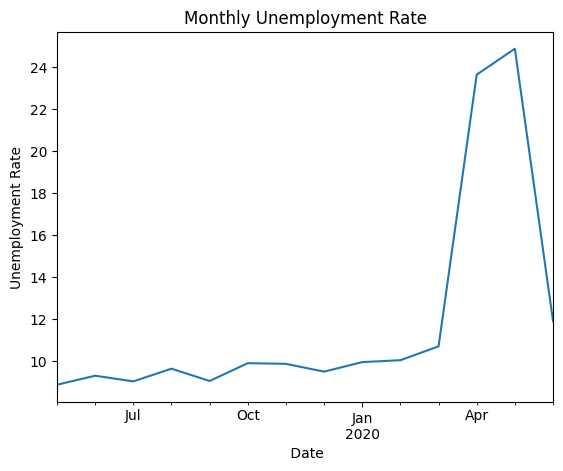

In [ ]:
monthly_unemployment = ndf.groupby(' Date')[' Estimated Unemployment Rate (%)'].mean()
plt.title('Monthly Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
monthly_unemployment.plot(kind='line')

<Axes: title={'center': 'Unemployment Rate by Area'}, xlabel='Area', ylabel='Unemployment Rate'>

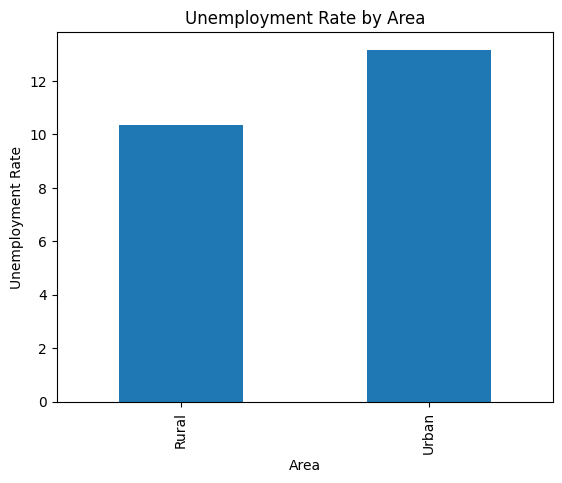

In [ ]:
unemployment_by_area = ndf.groupby('Area')[' Estimated Unemployment Rate (%)'].mean()
plt.title('Unemployment Rate by Area')
plt.xlabel('Area')
plt.ylabel('Unemployment Rate')
unemployment_by_area.plot(kind='bar')

<ipython-input-32-42d41212bc02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf[" Date"] = pd.to_datetime(ndf[" Date"])


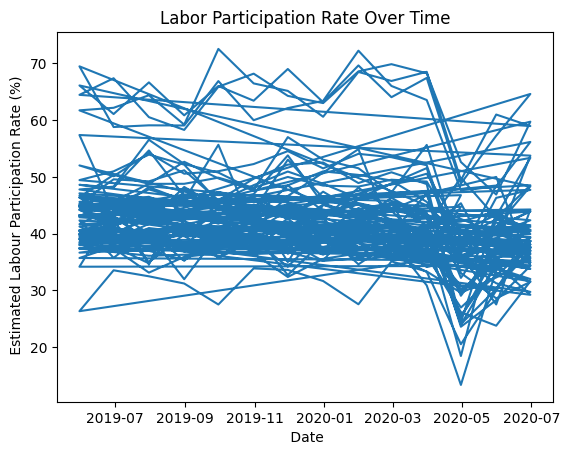

In [ ]:
ndf[" Date"] = pd.to_datetime(ndf[" Date"])

# Sort the data by date
data = ndf.sort_values(" Date")

plt.plot(ndf[" Date"], ndf[' Estimated Labour Participation Rate (%)'])
plt.xlabel(" Date")
plt.ylabel(' Estimated Labour Participation Rate (%)')
plt.title("Labor Participation Rate Over Time")
plt.show()

In [ ]:
correlation=ndf[' Estimated Unemployment Rate (%)'].corr(ndf[' Estimated Labour Participation Rate (%)'])
print("Correlation between Unemployment Rate and Labor Participation Rate:", correlation)

Correlation between Unemployment Rate and Labor Participation Rate: 0.0025767972819003182
